In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv

In [2]:
low_memory=False
pd.options.display.max_columns = 80
pd.options.display.max_rows = 80
%matplotlib inline

In [3]:
dados2018 = pd.read_csv(r'C:\Users\laislp\DOCENTES_CO.csv', usecols=['NU_ANO_CENSO', 'ID_DOCENTE', 'NU_IDADE', 'TP_SEXO', 'TP_COR_RACA', 'IN_NECESSIDADE_ESPECIAL', 'TP_ESCOLARIDADE'], delimiter='|', encoding='iso-8859-1')

In [4]:
# Tabelas de microdados do INEP usam números, faço a correspondência desses números com seus significados
troca_sexo = {1:'M',2:'F'}
troca_cor = {0:'NÃO DECLARADA',1:'BRANCA',2:'PRETA',3:'PARDA',4:'AMARELA',5:'INDÍGENA'}
troca_necessidade = {0:'N',1:'S'}
troca_escolaridade = {1:'FUND COMPL',2:'FUND INCOMPL',3:'MÉDIO COMPL',4:'SUPER COMPL'}

In [5]:
# Agora insiro colunas que trocam esses números pelos significados correspondentes
dados2018['IDADE'] = dados2018['NU_IDADE']
dados2018['SEXO'] = dados2018['TP_SEXO'].apply(lambda x: troca_sexo[x])
dados2018['COR'] = dados2018['TP_COR_RACA'].apply(lambda x: troca_cor[x])
dados2018['NECESSIDADES ESPECIAIS'] = dados2018['IN_NECESSIDADE_ESPECIAL'].apply(lambda x: troca_necessidade[x])
dados2018['ESCOLARIDADE'] = dados2018['TP_ESCOLARIDADE'].apply(lambda x: troca_escolaridade[x])

In [6]:
dados2018.columns

Index(['NU_ANO_CENSO', 'ID_DOCENTE', 'NU_IDADE', 'TP_SEXO', 'TP_COR_RACA',
       'IN_NECESSIDADE_ESPECIAL', 'TP_ESCOLARIDADE', 'IDADE', 'SEXO', 'COR',
       'NECESSIDADES ESPECIAIS', 'ESCOLARIDADE'],
      dtype='object')

In [7]:
# Tiro possíveis espaços do header do csv
dados2018.columns = dados2018.columns.to_series().apply(lambda x: x.strip())

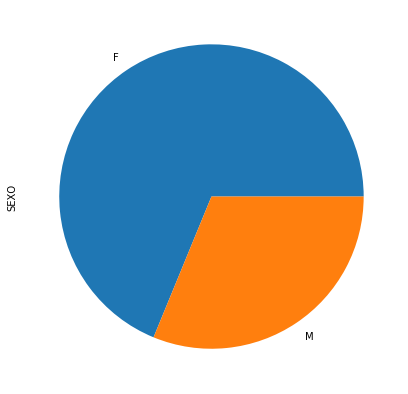

In [35]:
# Quantidade de docentes por sexo
dados2018['SEXO'] = dados2018['TP_SEXO'].apply(lambda x: troca_sexo[x])
dados2018.query('TP_SEXO == 1 or TP_SEXO == 2')['SEXO'].value_counts().head(26).plot(kind='pie', figsize=(7,7))

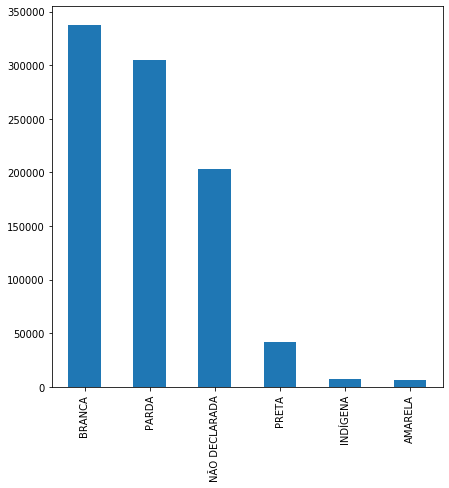

In [34]:
# Quantidade de docentes por raça
dados2018['COR'] = dados2018['TP_COR_RACA'].apply(lambda x: troca_cor[x])
dados2018.query('TP_COR_RACA != 1 or TP_COR_RACA == 1')['COR'].value_counts().head(26).plot(kind='bar', figsize=(7,7))

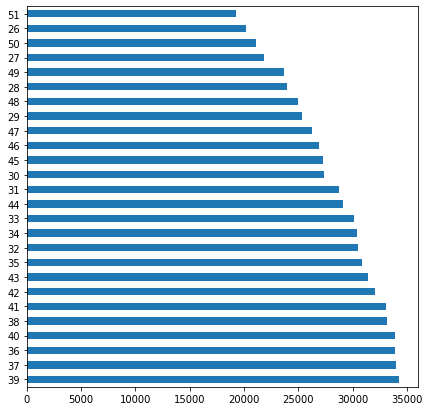

In [25]:
# Quantidade de docentes por idade
dados2018['IDADE'] = dados2018['NU_IDADE']
dados2018.query('NU_IDADE >= 10')['IDADE'].value_counts().head(26).plot(kind='barh', figsize=(7,7))

In [19]:
# Quantidade de docentes portadores de necessidades especiais
dados2018['NECESSIDADES ESPECIAIS'] = dados2018['IN_NECESSIDADE_ESPECIAL'].apply(lambda x: troca_necessidade[x])
dados2018.query('IN_NECESSIDADE_ESPECIAL == 1')['NECESSIDADES ESPECIAIS'].value_counts().sort_values()

S    2558
Name: NECESSIDADES ESPECIAIS, dtype: int64

In [20]:
# Quantidade de docentes com ensino superior completo
dados2018['ESCOLARIDADE'] = dados2018['TP_ESCOLARIDADE'].apply(lambda x: troca_escolaridade[x])
dados2018.query('TP_ESCOLARIDADE == 4')['ESCOLARIDADE'].value_counts().sort_values()

SUPER COMPL    799935
Name: ESCOLARIDADE, dtype: int64

** Com esses dados, podemos concluir que a maioria dos docentes no Brasil em 2018 é: **

** Mulheres, brancas, entre 36 e 40 anos, sem necessidades especiais, e com superior completo (portanto, já não são estagiárias) **

** Com isso, podemos refletir sobre as dinâmicas socioeconômicas racias, de gênero, e de acesso de pessoas com deficiência ao ensino superior. **